In [129]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [130]:
data = pd.read_csv('df_to_model.csv').set_index('date')

In [131]:
data.head()

,btc_price,btc_volume,eth_price,eth_volume,bnb_price,bnb_volume,vet_price,vet_volume,btt_price,btt_volume,hot_price,hot_volume
date,,,,,,,,,,,,
2013-04-28,135.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-29,141.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-30,135.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-01,117.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-02,103.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
data.index = pd.to_datetime(data.index)
data = data.sort_values(by='date')

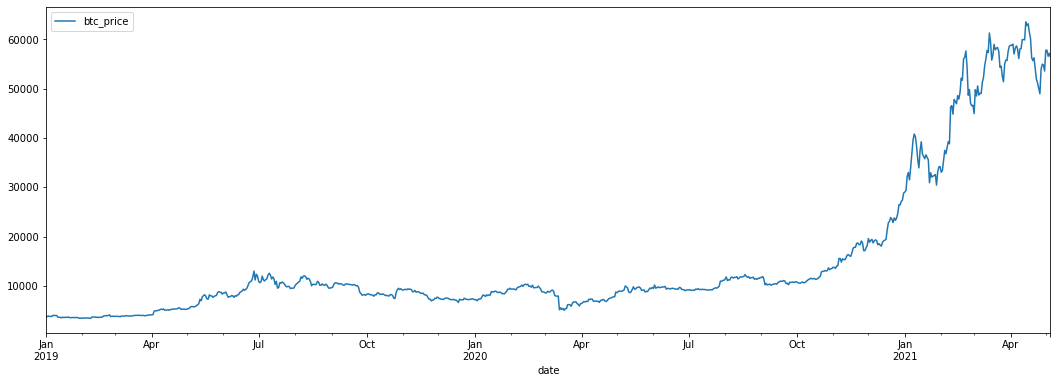

In [133]:
interval = slice('2019', '2021')
data[['btc_price']].loc[interval].plot(figsize=(18, 6))
plt.show()

Our btc data does not seem to have any pattern of seasonality or trend.

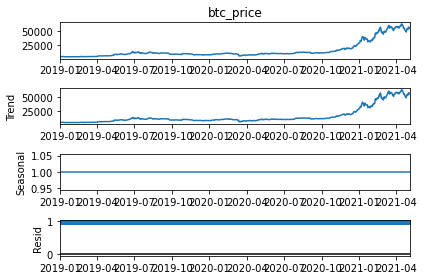

In [134]:
btc_decomposition = seasonal_decompose(data.loc[interval].btc_price, model='multiplicative', period=1)
btc_decomposition.plot()
plt.show()

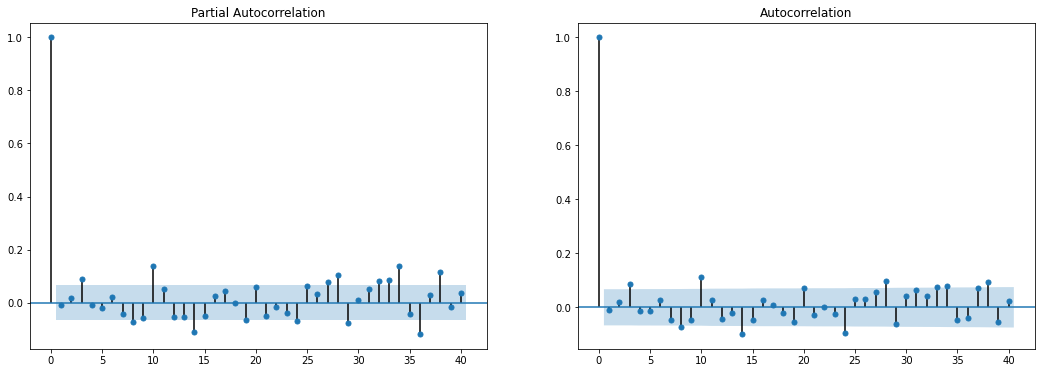

In [135]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
plot_pacf(data.loc[interval].btc_price.diff().dropna(), alpha=.05, lags=40, ax=ax[0], method='ols')  
plot_acf(data.loc[interval].btc_price.diff().dropna(), alpha=.05, lags=40, ax=ax[1])  
plt.show()

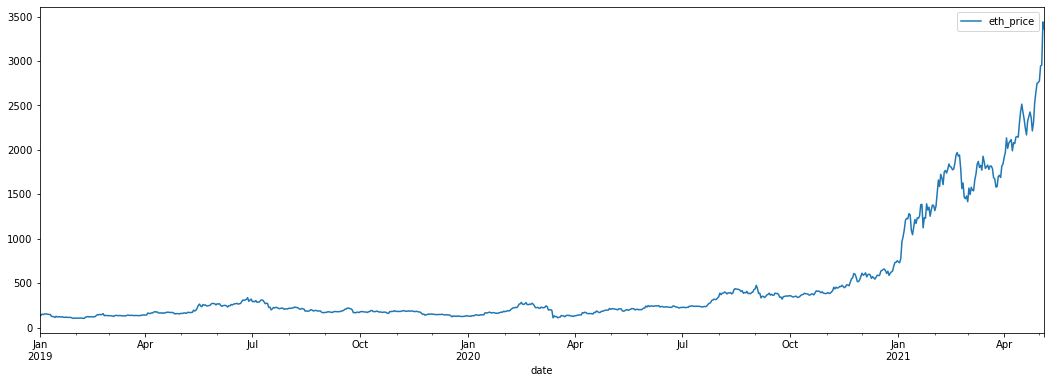

In [136]:
interval = slice('2019', '2021')
data[['eth_price']].loc[interval].plot(figsize=(18, 6))
plt.show()

Our eth data doesnt seem to have patterns either. Despite that, it seems to be very correlated with btc price

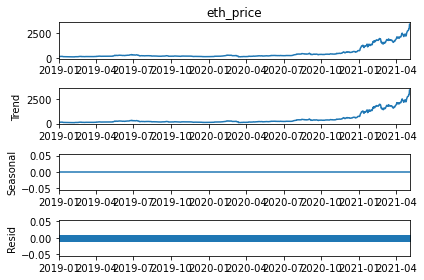

In [137]:
eth_decomposition = seasonal_decompose(data.loc[interval].eth_price, model='additive', period=1)
eth_decomposition.plot()
plt.show()

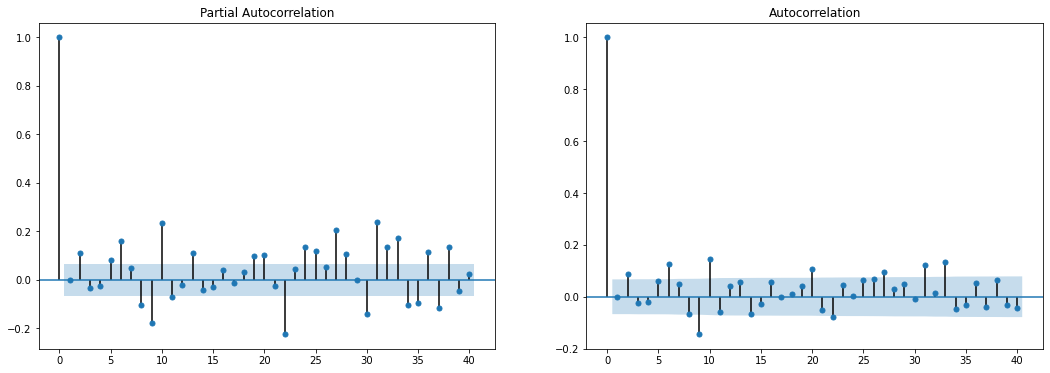

In [138]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
plot_pacf(data.loc[interval].eth_price.diff().dropna(), alpha=.05, lags=40, ax=ax[0], method='ols')  
plot_acf(data.loc[interval].eth_price.diff().dropna(), alpha=.05, lags=40, ax=ax[1])  
plt.show()

What about our smaller coins?

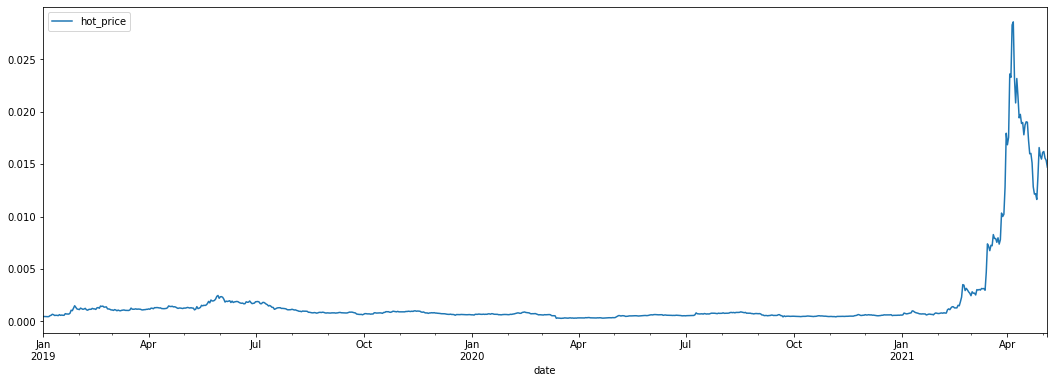

In [139]:
interval = slice('2019', '2021')
data[['hot_price']].loc[interval].plot(figsize=(18, 6))
plt.show()

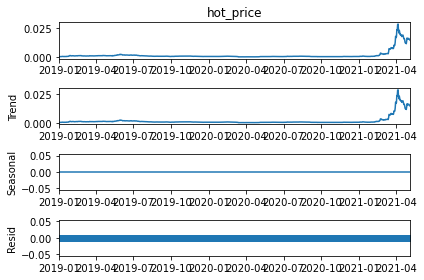

In [140]:
hot_decomposition = seasonal_decompose(data.loc[interval].hot_price, model='additive', period=1)
hot_decomposition.plot()
plt.show()

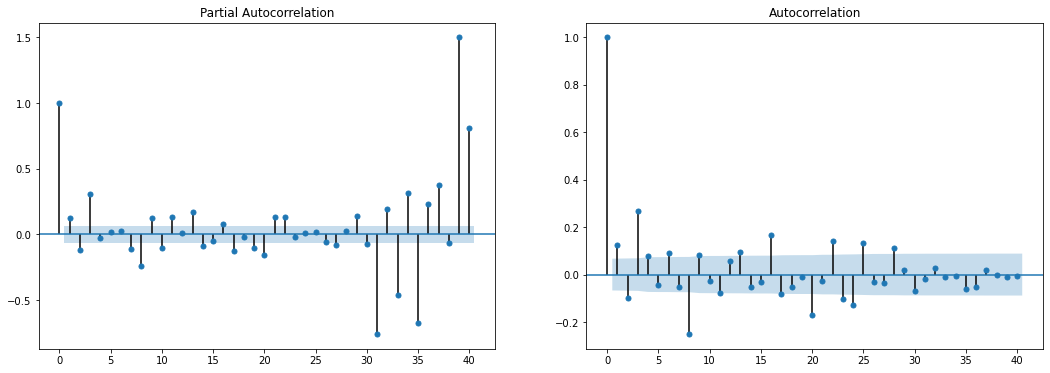

In [141]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
plot_pacf(data.loc[interval].hot_price.diff().dropna(), alpha=.05, lags=40, ax=ax[0], method='ols')  
plot_acf(data.loc[interval].hot_price.diff().dropna(), alpha=.05, lags=40, ax=ax[1])  
plt.show()

It does not seem to be a good case to use Taime Series Models